## Statified k-fold for a regression problem (validation)

Divide target into bins and then use the normal skfold. No of bins depends on the no of samples available (Sturge's Rule).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def sturge(N):
    return 1+np.log2(N)

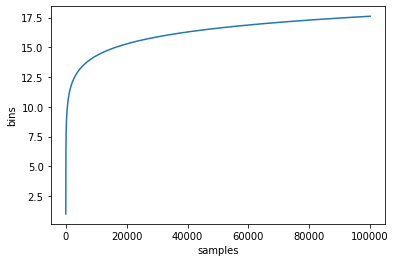

In [2]:
samples=list(range(1,100000))
plt.xlabel('samples')
plt.ylabel('bins')
plt.plot(samples,sturge(samples))

## Generate data and apply stratified k-fold for regression problem

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import model_selection
from sklearn import datasets

In [4]:
datasets.make_regression(n_samples=15000, n_features=100, n_targets=1)

(array([[ 0.2731799 ,  0.14836123,  0.75009067, ...,  0.0960706 ,
         -0.99204047, -0.70567268],
        [ 0.44980238, -2.02324817, -0.75215175, ...,  0.90042619,
         -0.26064439,  0.41845134],
        [ 1.21856785,  1.15153662,  1.50573353, ..., -0.0218321 ,
          0.58187303,  0.97787595],
        ...,
        [ 0.48862722, -0.72338954,  1.59648228, ..., -0.60721722,
         -0.06980026, -0.35972024],
        [ 0.85401855, -0.60872995, -0.00742905, ...,  0.1737908 ,
          0.05489073,  0.84307188],
        [-0.23333024,  0.2963102 , -1.18314404, ...,  0.55995892,
         -0.49029791,  0.26997149]]),
 array([  34.03176757,   61.24905096, -198.51467155, ...,   28.08650065,
        -107.35625225,  -99.1391131 ]))

Create data set with one target for the regression problem

In [5]:
X,y=datasets.make_regression(n_samples=15000, n_features=100, n_targets=1)

In [6]:
data=pd.DataFrame(X,columns=['f_{}'.format(i) for i in range(0,X.shape[1])])

In [7]:
data.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99
0,0.913141,1.380277,0.527357,-0.149046,-1.803627,0.470918,-1.119628,-0.735247,-1.277487,1.550019,...,0.819540,-1.567432,0.023127,1.077846,0.232681,0.133454,0.473734,-0.205363,-0.907598,-1.178783
1,0.179390,0.262944,1.510719,0.795390,0.703975,1.524085,-0.402881,0.180281,0.343596,0.203212,...,0.513557,-0.282707,1.376219,0.225215,0.736842,-0.274703,-0.886081,0.714162,-0.867129,0.050726
2,0.696693,-2.075168,-0.952338,-0.605773,-0.590337,0.821426,0.215457,-1.512798,0.314414,1.268503,...,0.863084,-0.569460,1.547074,-1.452647,1.609232,0.091589,1.218136,-0.583283,2.474200,-0.285408
3,0.322551,-0.885295,0.890547,0.034671,0.598507,-0.649949,1.070074,0.180052,-0.326639,-0.339676,...,0.198241,-0.045285,1.820389,0.367988,-0.135248,-0.692751,-0.019645,-0.897752,0.370438,-2.226322
4,2.374336,0.699540,0.755697,0.245787,0.086996,0.121952,0.766690,0.292039,0.082557,-1.563832,...,-0.014453,1.210717,-1.065146,-0.580388,1.382137,0.959917,-0.892955,0.194906,0.400080,0.547597


In [8]:
data["target"]=y

## Create folds on the dataset

In [9]:
data["kfold"]=-1

randomize data and reset index

In [10]:
data = data.sample(frac=1).reset_index(drop=True)

In [11]:
data.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,0.769234,-0.244046,-1.590393,-2.292147,1.681914,0.290996,0.084189,-2.016179,-0.750992,0.792489,...,-0.688516,0.668982,-1.095699,-0.347695,1.006526,0.069819,0.609207,-0.317122,-66.091356,-1
1,1.169465,-1.100541,-1.855820,-0.754314,0.192293,1.521091,-0.877960,1.131765,1.248682,-0.560425,...,-1.795440,0.838492,0.623165,-0.425823,-0.326344,-1.691703,-0.124784,1.332448,-222.315415,-1
2,0.674569,-0.685005,-1.506512,0.025108,0.420549,-0.233528,0.546361,0.380339,0.219094,-0.996460,...,1.545397,-0.952457,-0.795745,-0.030682,-1.054945,0.613974,1.197873,-0.196871,-21.357552,-1
3,0.033930,0.830177,-1.265541,-0.539031,-0.739091,0.534068,-0.562451,0.518239,-0.744118,0.063253,...,-1.138759,0.517208,1.304665,1.129249,0.144438,-1.303662,-0.249150,-0.504269,-82.297632,-1
4,-1.076596,-0.147441,2.730232,2.624043,1.039724,2.062431,-0.264853,-0.121299,0.204186,1.141624,...,-1.310986,0.765554,0.998226,0.589090,-1.109611,1.196104,0.322977,-0.516448,-112.005672,-1


In [12]:
nbins=np.round(sturge(y.size)).astype(int)
nbins

15

Bin targets into separate bins

In [13]:
data["bins"] = pd.cut(data.target,bins=nbins,labels=False)

In [14]:
data.bins

0         6
1         5
2         7
3         6
4         6
         ..
14995     6
14996     9
14997    12
14998     5
14999     8
Name: bins, Length: 15000, dtype: int64

Now based on the bin number, split into kfolds

In [15]:
nfolds=5
kf=model_selection.StratifiedKFold(n_splits=nfolds)

In [16]:
type(kf.split(data,y=data.bins))

generator

In [17]:
list(kf.split(data,y=data.bins))[3]

/home/gg/anaconda3/envs/aamlp/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


(array([    0,     1,     2, ..., 14997, 14998, 14999]),
 array([ 8460,  8578,  8629, ..., 12397, 12654, 13028]))

In [18]:
len(list(kf.split(data,y=data.bins)))

/home/gg/anaconda3/envs/aamlp/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


5

Has the `old_idx` and `new_idx`. Make new row with fold number as additional column using the `bins` value.

In [19]:
for fold_num, (old_idx,new_idx) in enumerate(kf.split(data,y=data.bins)):
    data.loc[new_idx,'kfold'] = fold_num

/home/gg/anaconda3/envs/aamlp/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [20]:
data = data.drop("bins", axis=1)

In [21]:
data[data.kfold==2]

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
4661,-0.074249,-0.028214,0.440647,1.237029,-0.554191,-0.831485,-0.757824,-0.000989,1.213722,0.302098,...,0.288006,0.209911,0.467591,0.217440,0.382533,1.498248,0.385507,0.918614,-513.137008,2
4724,-0.486889,-1.399545,2.433936,-0.270327,-0.987948,0.121950,-0.310972,0.311284,0.162247,1.250942,...,-0.486630,-0.304905,1.690199,0.297174,-0.530908,1.853784,0.720971,1.725709,-506.288443,2
4905,0.954553,-0.054878,0.771915,0.823128,-0.021288,0.200662,-0.274431,0.522220,0.385368,0.153003,...,-0.813277,-0.070158,-1.851532,-0.567963,-1.591273,1.460897,-1.054700,-0.099158,-539.882228,2
4930,0.448722,0.561287,0.545033,1.280492,-0.637685,-0.070092,0.320545,-0.424020,0.365530,-0.861835,...,0.398091,-0.912044,1.190447,-1.409670,-0.058840,0.729851,-1.637215,-0.935737,-521.421179,2
4932,0.792407,0.443214,1.528251,0.000813,1.235400,-0.326109,-0.937656,1.841479,0.677391,-0.166555,...,-0.823836,-0.486858,1.517941,0.423589,0.964440,-0.549520,0.044235,0.408502,-559.268243,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9187,0.732628,-1.574773,-0.674361,-0.654344,-0.197741,-1.909199,0.174166,0.565531,0.267554,1.173043,...,2.001744,1.510717,-0.595099,-0.117336,0.861368,-0.018503,1.280989,-0.316243,138.325034,2
9235,1.557197,0.226424,-0.043811,0.779245,0.258536,-0.048176,-0.813248,-0.739360,-0.119117,1.230270,...,0.996881,-1.222243,-0.213716,-1.515089,0.399987,-0.524435,-0.341241,-1.630611,570.928860,2
9252,-0.813971,1.727266,-0.407907,2.085999,-0.180448,-0.284472,1.055081,0.431774,0.146008,-1.157539,...,1.007876,0.396411,-0.607046,-0.620718,-0.833069,1.038938,-1.838441,-0.149036,505.475506,2
9434,-1.481777,0.503342,1.708353,-2.379256,2.215633,-0.536150,0.544401,2.405715,-0.822516,1.433590,...,1.396536,0.905182,1.521118,-1.634835,-0.342589,0.627045,0.035966,-0.146777,567.676188,2


## Define as a function

In [22]:
data=pd.DataFrame(X,columns=['f_{}'.format(i) for i in range(0,X.shape[1])])
data["target"]=y

In [23]:
def sturge(N):
    return 1+np.log2(N)

In [24]:
def create_fold(data,nfolds=5,target_col="target",kfold_col="kfold"):
    # randomize data
    data = data.sample(frac=1).reset_index(drop=True)
    # find required bins based on target
    nbins=np.round(sturge(y.size)).astype(int)
    data["bins"] = pd.cut(data[target_col],bins=nbins,labels=False)
    # make folds based on bins
    data["kfold"]=-1
    kf=model_selection.StratifiedKFold(n_splits=nfolds)
    for fold_num, (old_idx,new_idx) in enumerate(kf.split(data,y=data.bins)):
        data.loc[new_idx,kfold_col] = fold_num
    data = data.drop("bins", axis=1)
    return data

In [25]:
data=create_fold(data,nfolds=5,target_col="target",kfold_col="kfold")

/home/gg/anaconda3/envs/aamlp/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


### Check if this fold has the no skewed distribution of target variables

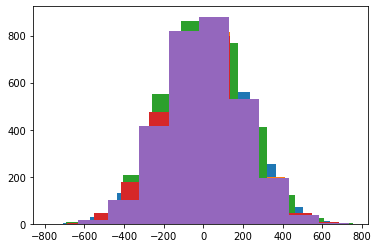

In [26]:
for fold in range(0,nfolds):
    plt.hist(data[data.kfold==fold].target)

This does not have the `target` uniformly distributed among each folds. Some classes have less than 10 members.

## Cross validation and model fitting with linear regression

In [27]:
from sklearn import model_selection

In [28]:
from sklearn import linear_model,metrics

In [29]:
cols=list(data.columns[:-2])

In [30]:
cols[-10:]

['f_90',
 'f_91',
 'f_92',
 'f_93',
 'f_94',
 'f_95',
 'f_96',
 'f_97',
 'f_98',
 'f_99']

In [45]:
fold=0
train_data=data[data.kfold!=fold].copy().reset_index(drop=True)
test_data=data[data.kfold==fold].copy().reset_index(drop=True)

In [46]:
lm = linear_model.LinearRegression()
reg=lm.fit(train_data[cols],train_data.target)

In [47]:
train_predictions=reg.predict(train_data[cols])
test_predictions=reg.predict(test_data[cols])

In [48]:
pd.DataFrame({'Actual': train_data.target, 'Predicted': train_predictions})

,Actual,Predicted
0,-686.884647,-686.884647
1,566.030476,566.030476
2,643.261385,643.261385
3,582.133327,582.133327
4,685.160010,685.160010
...,...,...
11995,290.208678,290.208678
11996,-234.417624,-234.417624
11997,-326.035831,-326.035831
11998,97.790632,97.790632


In [49]:
pd.DataFrame({'Actual': test_data.target, 'Predicted': test_predictions})

,Actual,Predicted
0,-159.738253,-159.738253
1,113.324462,113.324462
2,-232.220694,-232.220694
3,322.650042,322.650042
4,215.356558,215.356558
...,...,...
2995,-420.497107,-420.497107
2996,-389.274237,-389.274237
2997,449.584671,449.584671
2998,454.111765,454.111765


In [50]:
reg.score(train_data[cols],train_data.target)

1.0

In [51]:
train_accuracy= reg.score(train_data[cols],train_data.target)
test_accuracy=reg.score(test_data[cols],test_data.target)

In [52]:
test_accuracy

1.0

In [53]:
def onefold(fold,train_data, test_data,cols,depth=5):
    lm = linear_model.LinearRegression()
    reg=lm.fit(train_data[cols],train_data.target)
    train_predictions=reg.predict(train_data[cols])
    test_predictions=reg.predict(test_data[cols])
    train_accuracy= reg.score(train_data[cols],train_data.target)
    test_accuracy=reg.score(test_data[cols],test_data.target)
    return np.array([fold,train_accuracy,test_accuracy])   

In [54]:
train_cols=list(data.columns[:-2])
result=np.zeros((nfolds,3))

for fold in range(0,nfolds):
    train_data=data[data.kfold!=fold].copy().reset_index(drop=True)
    test_data=data[data.kfold==fold].copy().reset_index(drop=True)
    result[fold,:]=onefold(fold,train_data,test_data,cols=train_cols,depth=5)        

In [55]:
result

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 1., 1.],
       [3., 1., 1.],
       [4., 1., 1.]])

plot!

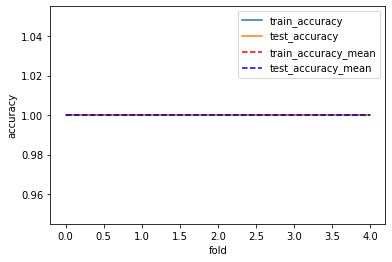

In [56]:
plt.plot(result[:,0],result[:,1],label='train_accuracy')
plt.plot(result[:,0],result[:,2],label='test_accuracy')
plt.plot(result[:,0],nfolds*[result[:,1].mean()],'r--', label='train_accuracy_mean')
plt.plot(result[:,0],nfolds*[result[:,2].mean()],'b--', label='test_accuracy_mean')
plt.xlabel("fold")
plt.ylabel("accuracy")
plt.legend()
plt.show()

Linear regression fits the model well.